#Ambiente de excecução

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
print(f"Usando OpenCV versão: {cv2.__version__}")

def cv2_imshow(img):
    plt.figure(figsize=(20, 12))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# from google.colab.patches import cv2_imshow

In [ ]:
# from google.colab import files
# upload = files.upload()

In [119]:
import re
import os # Garante que 'os' está importado nesta célula
import cv2 # Garante que 'cv2' está importado nesta célula
import numpy as np # Garante que 'numpy' está importado
import matplotlib.pyplot as plt # Garante que 'plt' está importado

# Define o diretório de saída
output_dir = './output/'
os.makedirs(output_dir, exist_ok=True)

# Pega os nomes dos arquivos como antes
# OBS: Certifique-se de que a célula está no diretório correto onde as imagens estão
cenario = 'cenario2'
img_names = [x for x in os.listdir(f'fotos/{cenario}') if x.endswith(('.jpeg', '.jpg', '.png'))]

# --- LÓGICA DE ORDENAÇÃO NUMÉRICA ---
def extrair_numero(nome_do_arquivo):
    try:
        parte_sem_extensao = nome_do_arquivo.split('.')[0]
        numero_str = parte_sem_extensao.split('_')[1]
        return int(numero_str)
    except:
        return -1

# Usa a função como chave para a ordenação (1, 2, 3...)
img_names.sort(key=extrair_numero)
# --- FIM DA LÓGICA DE ORDENAÇÃO ---


# >>> ADICIONE ESTA LINHA PARA INVERTER A ORDEM <<<
# Isso transforma a ordem [direita...esquerda] em [esquerda...direita]
img_names.reverse()


# Imprime a lista final para você conferir
print("Ordem de arquivos corrigida (esquerda para a direita):")
print(img_names)

# O resto do código continua igual, carregando as imagens na ordem correta
images = [cv2.imread(f'fotos/{cenario}/' + nome) for nome in img_names][:7]  # Carrega todas as imagens na ordem correta
images_cinza = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

print(f"\nCarregadas {len(images)} imagens na ordem correta para a montagem.")

Ordem de arquivos corrigida (esquerda para a direita):
['cenario2_63.jpeg', 'cenario2_62.jpeg', 'cenario2_61.jpeg', 'cenario2_60.jpeg', 'cenario2_59.jpeg', 'cenario2_58.jpeg', 'cenario2_57.jpeg', 'cenario2_56.jpeg', 'cenario2_55.jpeg', 'cenario2_54.jpeg', 'cenario2_53.jpeg', 'cenario2_52.jpeg', 'cenario2_51.jpeg', 'cenario2_50.jpeg', 'cenario2_49.jpeg', 'cenario2_48.jpeg', 'cenario2_47.jpeg', 'cenario2_46.jpeg', 'cenario2_45.jpeg', 'cenario2_44.jpeg', 'cenario2_43.jpeg', 'cenario2_42.jpeg', 'cenario2_41.jpeg', 'cenario2_40.jpeg', 'cenario2_39.jpeg', 'cenario2_38.jpeg', 'cenario2_37.jpeg', 'cenario2_36.jpeg', 'cenario2_35.jpeg', 'cenario2_34.jpeg', 'cenario2_33.jpeg', 'cenario2_32.jpeg', 'cenario2_31.jpeg', 'cenario2_30.jpeg', 'cenario2_29.jpeg', 'cenario2_28.jpeg', 'cenario2_27.jpeg', 'cenario2_26.jpeg', 'cenario2_25.jpeg', 'cenario2_24.jpeg', 'cenario2_23.jpeg', 'cenario2_22.jpeg', 'cenario2_21.jpeg', 'cenario2_20.jpeg', 'cenario2_19.jpeg', 'cenario2_18.jpeg', 'cenario2_17.jpeg', 'cen

In [ ]:
import cv2

# Load images

# Create a Stitcher object
stitcher = cv2.Stitcher_create()

# Stitch the images
status, stitched_image = stitcher.stitch(images)

# Check the stitching status
if status == cv2.Stitcher_OK:
    cv2_imshow(stitched_image)

else:
    print(f"Image stitching failed with status: {status}")

# Detecção e Extração de Características

Utilizando o SIFT

In [ ]:
"""
SIFT parameters
nfeatures:	Limits the max number of strongest keypoints returned. If too high, too many points; lower it to reduce keypoints.
contrastThreshold:	Higher values reduce keypoints in low-contrast areas. Default 0.04. Increase to detect fewer points.
edgeThreshold	Controls: edge response filtering. Higher values allow more edge points; lower removes edge-like keypoints.
nOctaveLayers:	More layers = finer scale-space detection; can increase number of keypoints slightly.
sigma:	Initial Gaussian blur. Larger sigma smooths image, reducing noise and small keypoints.
"""
sift = cv2.SIFT_create(
    nfeatures=1000,          # Maximum number of keypoints to retain
    nOctaveLayers=3,         # Number of layers in each octave (affects scale space granularity)
    contrastThreshold=0.04,  # Minimum contrast for keypoints
    edgeThreshold=10,        # Minimum edge response (reduces edge keypoints)
    sigma=1.2                # Gaussian smoothing applied at first octave
)

# Contains sift (keypoints, desc)
# sift = lista de tuplas:
# sift[0][0] = keypoint da imagem 0
# sift[0][1] = descriptor da imagem 0
# sift[1][0] = keypoint da imagem 1 (...)
sift = [sift.detectAndCompute(im, None) for im in images_cinza]

"""
cv2.drawKeypoints(image, keypoints, outImage, color=None, flags=0) draws keypoints on an image.
Parameters:
image: Original BGR image.
keypoints: List of detected keypoints.
outImage: Output image. None means OpenCV creates a copy.
flags: How keypoints are drawn. Key options:
  cv2.DRAW_MATCHES_FLAGS_DEFAULT: Simple small circle.
  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: Draws size and orientation of keypoints (circles with lines).
  cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS: Ignores points with low response.
"""
img_sift = cv2.drawKeypoints(images[0], sift[0][0], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img_sift)

img_sift = cv2.drawKeypoints(images[1], sift[1][0], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img_sift)


Utilizando o ORB

In [ ]:
"""
ORB parameters
nfeatures:	Maximum number of keypoints returned. Higher = more points.
scaleFactor:	Scale pyramid factor. Each level is prev_level / scaleFactor. Smaller factor → more levels → more keypoints.
nlevels:	Number of pyramid levels. More levels → detects features at more scales.
edgeThreshold:	Margin around image where keypoints are ignored. Prevents keypoints too close to edges.
firstLevel:	Base level of pyramid. Usually 0.
WTA_K:	Number of points used for computing BRIEF descriptor (2,3,4). Higher = more distinctive but slower.
scoreType:	How keypoints are ranked:
  cv2.ORB_HARRIS_SCORE → uses Harris corner score.
  cv2.ORB_FAST_SCORE → uses FAST score. |
  | patchSize | Size of patch around keypoint for descriptor computation. Larger = more context, slower. |
  | fastThreshold | Threshold for FAST corner detection. Higher → fewer keypoints; lower → more keypoints. |
"""
orb = cv2.ORB_create(
    nfeatures=200,         # Max number of keypoints to retain
    scaleFactor=1.2,       # Pyramid decimation ratio between levels
    nlevels=4,             # Number of pyramid levels
    edgeThreshold=31,      # Size of border to ignore edges
    firstLevel=0,          # Index of first pyramid level
    WTA_K=2,               # Number of points for BRIEF descriptor (2,3,4)
    scoreType=cv2.ORB_HARRIS_SCORE,  # Method to rank keypoints
    patchSize=31,          # Size of patch used by BRIEF descriptor
    fastThreshold=20       # Threshold for FAST keypoint detection
)

# Contains orb (keypoints, desc)
orb = [orb.detectAndCompute(im, None) for im in images_cinza]

img_orb = cv2.drawKeypoints(images[0], orb[0][0], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img_orb)

# Emparelhamento de Características

In [ ]:
"""
Brute-Force Matcer

Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation.
And the closest one is returned.

Lets take as an example images 1 and 2

"""

# BFMatcher with default params
bf = cv2.BFMatcher()
# Corrected indices to access the first two images (index 0 and 1)
matches = bf.knnMatch(sift[0][1], sift[1][1], k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# Corrected indices for images and sift to match the first two images
matched_image = cv2.drawMatchesKnn(images[0], sift[0][0], images[1], sift[1][0], good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_image),plt.show()

In [ ]:
"""
FLANN = Fast Library for Approximate Nearest Neighbors, optimized for large datasets and high-dimensional descriptors.

For FLANN based matcher, we need to pass two dictionaries which specifies the algorithm to be used, its related parameters etc.

Parameters:
  algorithm=1 → KD-tree (best for SIFT/SURF descriptors).
  trees=5 → number of KD-trees in the index (more trees = higher accuracy, slower).
  checks=50 → number of times to check trees for nearest neighbors (higher = more accurate, but takes more time).
"""
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

In [ ]:
"""
knnMatch() finds the two nearest neighbors for each descriptor.
We use k=2 because Lowe’s ratio test requires two closest matches.

A descriptor is a numerical vector that describes the local image patch around a keypoint.
For SIFT, each descriptor is 128-dimensional.
Descriptors encode scale, orientation, and gradient information, so that we can compare keypoints across images.

matches = flann.knnMatch(des1, des2, k=2)
des1 → descriptors from image 1
des2 → descriptors from image 2
flann.knnMatch() compares all vectors in des1 to all vectors in des2 and finds the closest matches using Euclidean distance.
"""
matches = []
for i in range(len(sift) - 1):
  mtchs = flann.knnMatch(sift[i][1], sift[i + 1][1], k = 2) # Total matches
  # Lowe's tet ration
  """
  m = best match, n = second-best match.
  m.distance = Euclidean distance between descriptors.
  Ratio test keeps matches where best match is significantly closer than second-best.
  Threshold 0.7 is typical (adjustable).
  """
  good_matches = []
  for m, n in mtchs:
      if m.distance < 0.6 * n.distance:
          good_matches.append(m)

  print(f"{i} and {i+1} Good matches after ratio test: {len(good_matches)}")
  matches.append(good_matches)

In [ ]:
img_matches = cv2.drawMatches(
    images_cinza[2], sift[2][0],
    images_cinza[3], sift[3][0],
    matches[2], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
"""
cv2.drawMatches() draws lines connecting matching keypoints.
flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS → only draws matched keypoints, not all keypoints.
"""
cv2_imshow(img_matches)

# Estimação de Homografia e Alinhamento (Falta generalizar para todas a imagens e arrumar a propagação de erro das deformações)

In [ ]:
def encontrar_correspondencias(desc1, desc2):
    """Encontra correspondências entre dois conjuntos de descritores usando o teste de razão de Lowe."""
    bf = cv2.BFMatcher()
    # Encontra as 2 melhores correspondências para cada descritor
    matches = bf.knnMatch(desc1, desc2, k=2)

    # Aplica o teste de razão para manter apenas as boas correspondências
    boas_correspondencias = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            boas_correspondencias.append(m)
    return boas_correspondencias

In [ ]:
def encontrar_homografia(correspondencias, kp1, kp2):
    """Calcula a matriz de homografia usando RANSAC a partir das correspondências."""
    # Requer pelo menos 4 correspondências para calcular a homografia
    if len(correspondencias) > 4:
        # Extrai as localizações dos pontos correspondentes
        pontos_origem = np.float32([kp1[m.queryIdx].pt for m in correspondencias]).reshape(-1, 1, 2)
        pontos_destino = np.float32([kp2[m.trainIdx].pt for m in correspondencias]).reshape(-1, 1, 2)

        # Encontra a homografia usando o algoritmo RANSAC
        # O 5.0 é o RANSAC reprojection threshold: distância máxima em pixels
        # para um ponto ser considerado inlier.
        matriz_homografia, mascara = cv2.findHomography(pontos_origem, pontos_destino, cv2.RANSAC, 5.0)

        return matriz_homografia, mascara
    return None, None

In [ ]:
def calcular_todas_as_homografias(images, sifts):
    """Calcula as homografias entre todos os pares de imagens adjacentes."""
    homografias = []
    for i in range(len(images) - 1):
        kp1, desc1 = sifts[i]
        kp2, desc2 = sifts[i+1]

        # Usa as funções que você já tem
        correspondencias = encontrar_correspondencias(desc1, desc2)
        H, _ = encontrar_homografia(correspondencias, kp1, kp2)

        if H is None:
            raise ValueError(f"Não foi possível calcular a homografia entre a imagem {i} e {i+1}")

        homografias.append(H)

    return homografias

In [ ]:
def calcular_homografias_para_referencia(homografias_parciais, imagem_referencia_idx):
    """Calcula as homografias de todas as imagens em relação a uma imagem de referência."""
    num_imagens = len(homografias_parciais) + 1
    homografias_globais = [None] * num_imagens

    # A homografia da imagem de referência para ela mesma é a matriz identidade
    H_ref_atual = np.identity(3)
    homografias_globais[imagem_referencia_idx] = H_ref_atual

    # Calcula as homografias para as imagens à DIREITA da referência
    for i in range(imagem_referencia_idx, num_imagens - 1):
        H_inv = np.linalg.inv(homografias_parciais[i])
        H_ref_atual = H_ref_atual.dot(H_inv)
        homografias_globais[i+1] = H_ref_atual

    # Calcula as homografias para as imagens à ESQUERDA da referência
    H_ref_atual = np.identity(3)
    for i in range(imagem_referencia_idx - 1, -1, -1):
        H_ref_atual = H_ref_atual.dot(homografias_parciais[i])
        homografias_globais[i] = H_ref_atual

    return homografias_globais

## Diferentes funções de renderização do panorama

In [104]:
def renderizar_panorama_naive(images, homografias):
    """
    Renderiza o panorama final deformando todas as imagens para um canvas comum.
    """
    # Encontra os limites do panorama final
    x_min, y_min = np.inf, np.inf
    x_max, y_max = -np.inf, -np.inf

    for i, img in enumerate(images):
        h, w = img.shape[:2]
        cantos = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

        # Projeta os cantos da imagem no plano do panorama
        H = homografias[i]
        cantos_transformados = cv2.perspectiveTransform(cantos, H)

        # Atualiza os mínimos e máximos
        x_min = min(x_min, np.min(cantos_transformados[:,:,0]))
        x_max = max(x_max, np.max(cantos_transformados[:,:,0]))
        y_min = min(y_min, np.min(cantos_transformados[:,:,1]))
        y_max = max(y_max, np.max(cantos_transformados[:,:,1]))

    # Cria uma matriz de translação para garantir que todas as coordenadas sejam positivas
    matriz_translacao = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])

    largura_final = int(np.ceil(x_max - x_min))
    altura_final = int(np.ceil(y_max - y_min))

    # Prepara o canvas final
    panorama = np.zeros((altura_final, largura_final, 3), dtype=np.uint8)

    # Deforma e coloca cada imagem no canvas
    for i, img in enumerate(images):
            
        # Aplica a translação à homografia de cada imagem
        H_final = matriz_translacao.dot(homografias[i])

        # Deforma a imagem
        img_deformada = cv2.warpPerspective(img, H_final, (largura_final, altura_final))
        # Cria uma máscara para a área não preta da imagem deformada
        mascara_nao_preta = np.all(img_deformada != [0, 0, 0], axis=2)
        
        # Combina a imagem deformada com o panorama
        panorama[mascara_nao_preta] = img_deformada[mascara_nao_preta]

    return panorama

In [ ]:
import numpy as np

def match_histograms(img1, img2, mask=None):
    # converte para LAB (mais robusto)
    img1_lab = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
    img2_lab = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)

    # calcula média e desvio do canal L (luminosidade)
    l1, a1, b1 = cv2.split(img1_lab)
    l2, a2, b2 = cv2.split(img2_lab)

    mean1, std1 = cv2.meanStdDev(l1, mask=mask)
    mean2, std2 = cv2.meanStdDev(l2, mask=mask)

    # corrige img2 para igualar img1
    l2_norm = ((l2 - mean2[0][0]) * (std1[0][0] / (std2[0][0] + 1e-6)) + mean1[0][0])
    l2_norm = np.clip(l2_norm, 0, 255).astype(np.uint8)

    img2_lab = cv2.merge([l2_norm, a2, b2])
    img2_corr = cv2.cvtColor(img2_lab, cv2.COLOR_LAB2BGR)

    return img2_corr

def renderizar_panorama_morfologia(images, homografias):
    """
    Renderiza o panorama final deformando todas as imagens para um canvas comum.
    """
    # Encontra os limites do panorama final
    x_min, y_min = np.inf, np.inf
    x_max, y_max = -np.inf, -np.inf

    for i, img in enumerate(images):
        h, w = img.shape[:2]
        cantos = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

        # Projeta os cantos da imagem no plano do panorama
        H = homografias[i]
        cantos_transformados = cv2.perspectiveTransform(cantos, H)

        # Atualiza os mínimos e máximos
        x_min = min(x_min, np.min(cantos_transformados[:,:,0]))
        x_max = max(x_max, np.max(cantos_transformados[:,:,0]))
        y_min = min(y_min, np.min(cantos_transformados[:,:,1]))
        y_max = max(y_max, np.max(cantos_transformados[:,:,1]))

    # Cria uma matriz de translação para garantir que todas as coordenadas sejam positivas
    matriz_translacao = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])

    largura_final = int(np.ceil(x_max - x_min))
    altura_final = int(np.ceil(y_max - y_min))

    # Prepara o canvas final
    panorama = np.zeros((altura_final, largura_final, 3), dtype=np.uint8)

    # Deforma e coloca cada imagem no canvas
    for i, img in enumerate(images):

        if i > 0:
            img = match_histograms(images[0], img)
            
        # Aplica a translação à homografia de cada imagem
        H_final = matriz_translacao.dot(homografias[i])

        # Deforma a imagem
        img_deformada = cv2.warpPerspective(img, H_final, (largura_final, altura_final))
        # Cria uma máscara para a área não preta da imagem deformada
        mascara_nao_preta = np.all(img_deformada != [0, 0, 0], axis=2)
        # Encontra a máscara de sobreposição para evitar sobrescrever com pixels pretos
        mascara_nao_preta = cv2.dilate(mascara_nao_preta.astype(np.uint8), np.ones((5, 5), np.uint8)).astype(bool) # Dilatação para preencher buracos
        mascara_nao_preta = cv2.erode(mascara_nao_preta.astype(np.uint8), np.ones((9, 9), np.uint8)).astype(bool) # Erosão para remover borda preta
        
        # Combina a imagem deformada com o panorama
        panorama[mascara_nao_preta] = img_deformada[mascara_nao_preta]

    return panorama

In [ ]:
def renderizar_panorama_final(images, homografias):
    """
    Renderiza o panorama final deformando todas as imagens para um canvas comum.
    """
    # Encontra os limites do panorama final
    x_min, y_min = np.inf, np.inf
    x_max, y_max = -np.inf, -np.inf

    for i, img in enumerate(images):
        h, w = img.shape[:2]
        cantos = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

        # Projeta os cantos da imagem no plano do panorama
        H = homografias[i]
        cantos_transformados = cv2.perspectiveTransform(cantos, H)

        # Atualiza os mínimos e máximos
        x_min = min(x_min, np.min(cantos_transformados[:,:,0]))
        x_max = max(x_max, np.max(cantos_transformados[:,:,0]))
        y_min = min(y_min, np.min(cantos_transformados[:,:,1]))
        y_max = max(y_max, np.max(cantos_transformados[:,:,1]))

    # Cria uma matriz de translação para garantir que todas as coordenadas sejam positivas
    matriz_translacao = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])

    largura_final = int(np.ceil(x_max - x_min))
    altura_final = int(np.ceil(y_max - y_min))

    # Prepara o canvas final
    panorama = np.zeros((altura_final, largura_final, 3), dtype=np.float32)

    pesos = np.zeros((altura_final, largura_final), dtype=np.float32)

    # Processa cada imagem
    for i, img in enumerate(images):

        H_final = matriz_translacao.dot(homografias[i])

        img_deformada = cv2.warpPerspective(img, H_final, (largura_final, altura_final))

        # Máscara binária
        mascara = np.any(img_deformada > 0, axis=2).astype(np.float32)

        # Distância até a borda (gera feather suave)
        dist = cv2.distanceTransform(mascara.astype(np.uint8), cv2.DIST_L2, 5)
        dist = dist / (dist.max() + 1e-5)  # normalização 0-1

        # Atualiza blending
        for c in range(3):
            panorama[:,:,c] += img_deformada[:,:,c] * dist
        pesos += dist

    # Evita divisão por zero
    pesos[pesos == 0] = 1
    panorama /= pesos[:,:,None]

    return panorama.astype(np.uint8)

## Funções para correção de marcas de costura via filtros

In [85]:
def encontra_bordas(panorama_naive):
    teste = panorama_naive.copy()

    # panorama_gray = cv2.cvtColor(teste, cv2.COLOR_BGR2GRAY)
    panorama_gray_0 = teste[:,:,0]
    panorama_gray_1 = teste[:,:,1]
    panorama_gray_2 = teste[:,:,2]

    # Aplica filtro Laplaciano (passa-alta)
    bordas_0 = cv2.Laplacian(panorama_gray_0, cv2.CV_64F)
    bordas_0 = np.abs(bordas_0)
    bordas_0 = cv2.normalize(bordas_0, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Aplica filtro Laplaciano (passa-alta)
    bordas_1 = cv2.Laplacian(panorama_gray_1, cv2.CV_64F)
    bordas_1 = np.abs(bordas_1)
    bordas_1 = cv2.normalize(bordas_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Aplica filtro Laplaciano (passa-alta)
    bordas_2 = cv2.Laplacian(panorama_gray_2, cv2.CV_64F)
    bordas_2 = np.abs(bordas_2)
    bordas_2 = cv2.normalize(bordas_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    bordas = (bordas_0 + bordas_1 + bordas_2) // 3

    # Cria uma máscara binária para destacar apenas as linhas mais fortes
    _, mascara_bordas = cv2.threshold(bordas, 30, 255, cv2.THRESH_BINARY)

    # Visualiza apenas as linhas sobre fundo branco
    imagem_linhas = np.ones_like(teste) * 0
    imagem_linhas[mascara_bordas > 0] = [255, 255, 255]

    imagem_linhas = cv2.dilate(imagem_linhas, np.ones((5, 5), np.uint8))
    imagem_linhas = cv2.erode(imagem_linhas, np.ones((3, 3), np.uint8))

    return imagem_linhas

def aplica_filtro_mascarado(panorama_naive, imagem_linhas):

    imagem = panorama_naive.copy()

    # 1. Aplica o filtro desejado na imagem inteira
    imagem_filtrada = cv2.medianBlur(imagem, 5)

    imagem_filtrada = np.abs(imagem_filtrada)
    imagem_filtrada = cv2.normalize(imagem_filtrada, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # 2. Cria uma cópia da imagem original para receber o filtro apenas nas áreas da máscara
    imagem_resultado = imagem.copy()

    # 3. Aplica o filtro apenas onde a máscara está ativada
    imagem_resultado[imagem_linhas > 0] = imagem_filtrada[imagem_linhas > 0]

    return imagem_resultado

## Evolução do trabalho passo a passo

### Bordas visíveis e correção por filtro

--- Iniciando a criação do panorama naive com correção por bordas ---


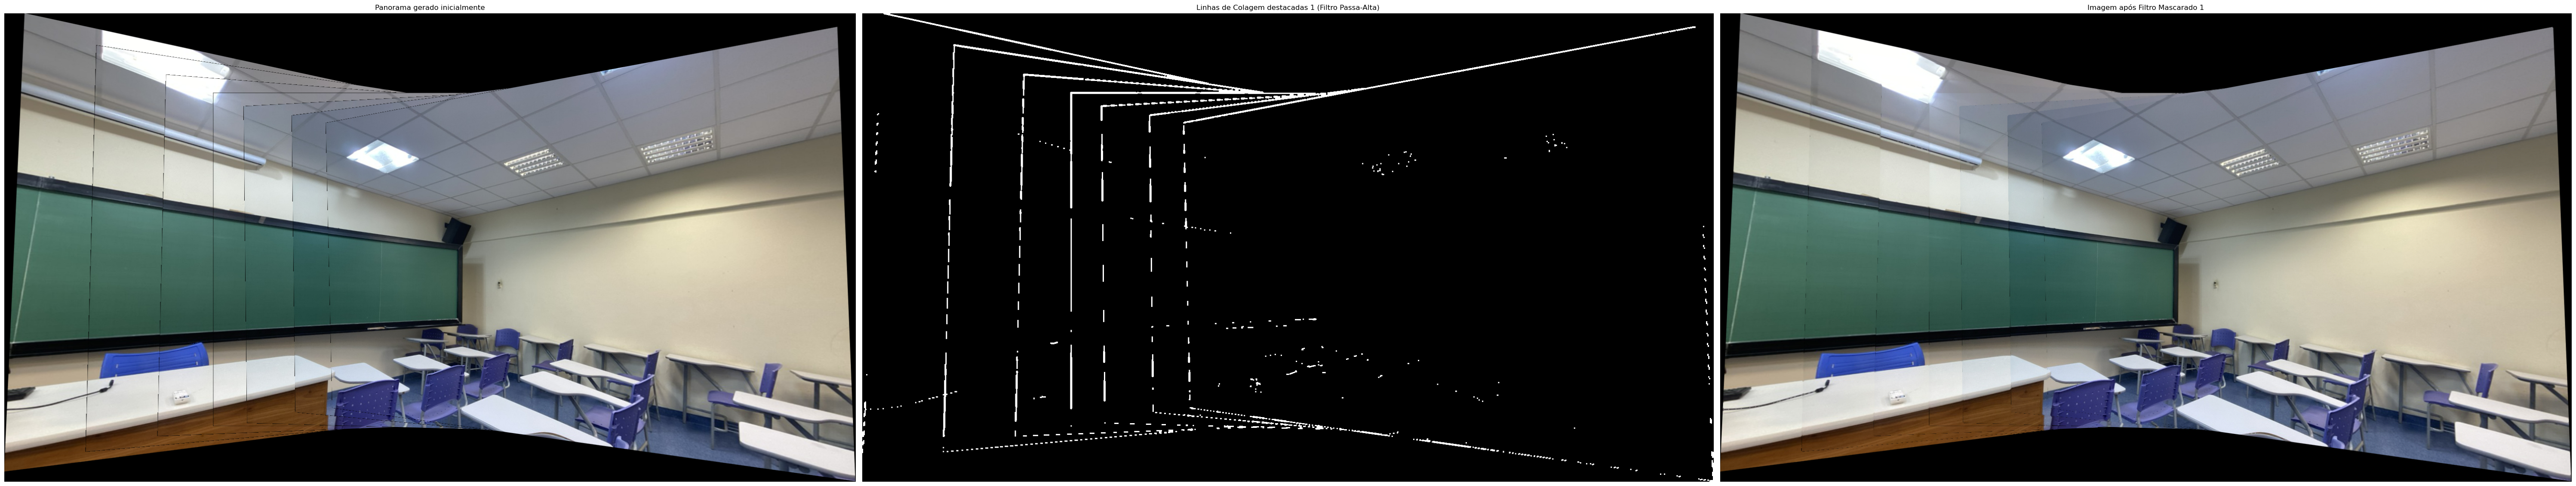

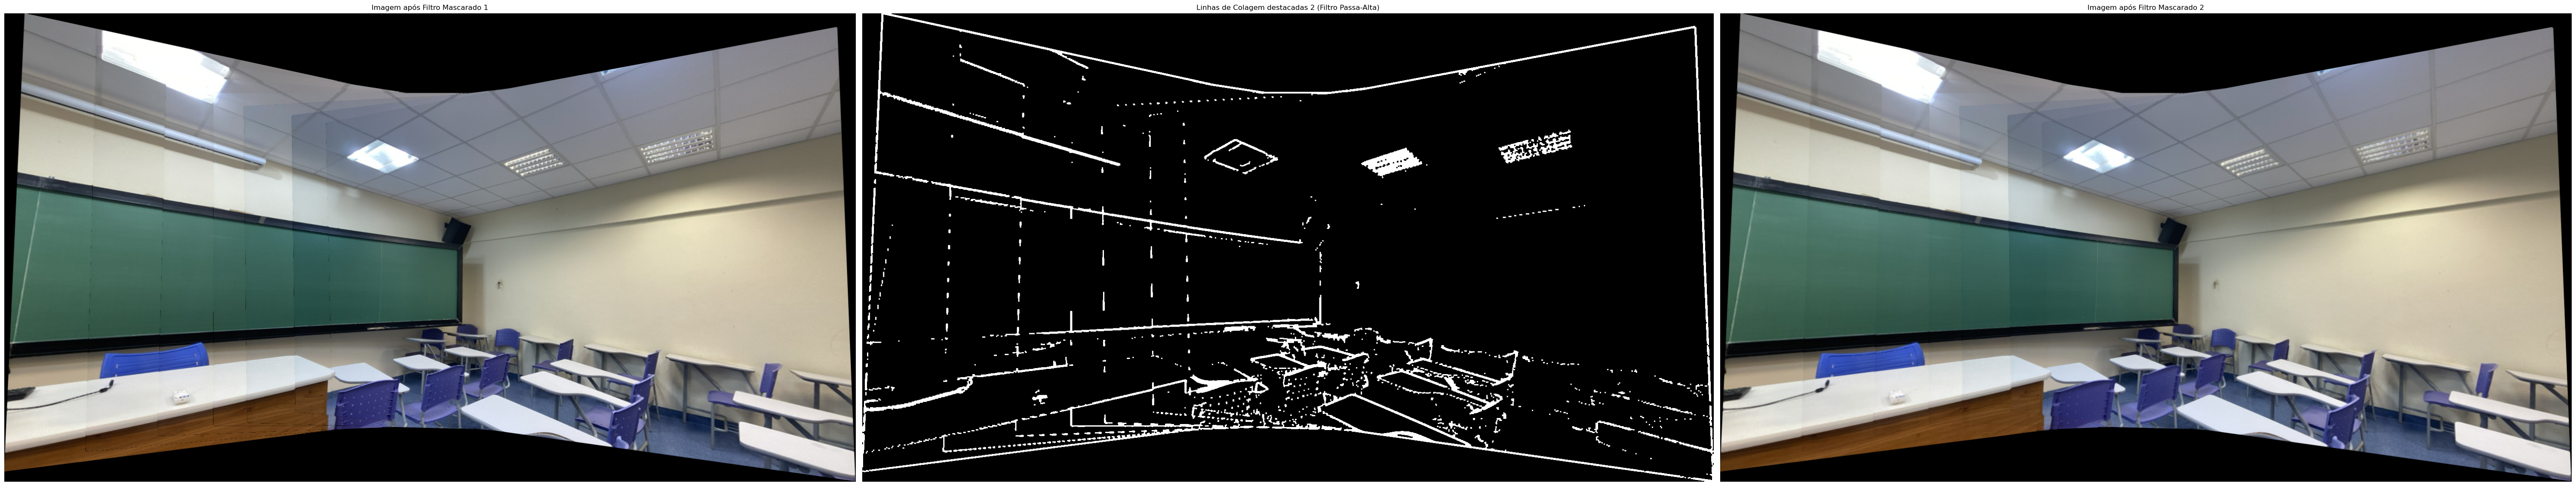

In [125]:
print("--- Iniciando a criação do panorama naive com correção por bordas ---")

# Passo 1: Calcular homografias entre pares de imagens
homografias_parciais_naive = calcular_todas_as_homografias(images, sift)

# Passo 2: Calcular homografias em relação à imagem central
idx_ref_naive = len(images) // 2
homografias_para_referencia = calcular_homografias_para_referencia(homografias_parciais_naive, idx_ref_naive)

# Passo 3: Renderizar o panorama
panorama_naive = renderizar_panorama_naive(images, homografias_para_referencia)
# Passo 4: Encontrar bordas
imagem_linhas_1 = encontra_bordas(panorama_naive)
# Passo 5: Aplicar filtro mascarado
imagem_resultado_1 = aplica_filtro_mascarado(panorama_naive, imagem_linhas_1)


# Exibir a imagem antes, as linhas encontradas, e a imagem após o filtro

fig_1, axis_1 = plt.subplots(1, 3, figsize=(60, 12))
# Exibir a imagem original
axis_1[0].imshow(cv2.cvtColor(panorama_naive, cv2.COLOR_BGR2RGB))
axis_1[0].set_title("Panorama gerado inicialmente")
axis_1[0].axis('off')

# Exibir as linhas encontradas
axis_1[1].imshow(cv2.cvtColor(imagem_linhas_1, cv2.COLOR_BGR2RGB))
axis_1[1].set_title("Linhas de Colagem destacadas 1 (Filtro Passa-Alta)")
axis_1[1].axis('off')

# Exibir a imagem após o filtro
axis_1[2].imshow(cv2.cvtColor(imagem_resultado_1, cv2.COLOR_BGR2RGB))
axis_1[2].set_title("Imagem após Filtro Mascarado 1")
axis_1[2].axis('off')
plt.tight_layout()
plt.show()

# Passo 6: Encontrar bordas novamente
imagem_linhas_2 = encontra_bordas(imagem_resultado_1)
# Passo 7: Aplicar filtro mascarado novamente
imagem_resultado_2 = aplica_filtro_mascarado(imagem_resultado_1, imagem_linhas_2)
# Exibir o resultado

fig_2, axis_2 = plt.subplots(1, 3, figsize=(60, 12))
# Exibir a imagem original
axis_2[0].imshow(cv2.cvtColor(imagem_resultado_1, cv2.COLOR_BGR2RGB))
axis_2[0].set_title("Imagem após Filtro Mascarado 1")
axis_2[0].axis('off')

# Exibir as linhas encontradas
axis_2[1].imshow(cv2.cvtColor(imagem_linhas_2, cv2.COLOR_BGR2RGB))
axis_2[1].set_title("Linhas de Colagem destacadas 2 (Filtro Passa-Alta)")
axis_2[1].axis('off')

# Exibir a imagem após o filtro
axis_2[2].imshow(cv2.cvtColor(imagem_resultado_2, cv2.COLOR_BGR2RGB))
axis_2[2].set_title("Imagem após Filtro Mascarado 2")
axis_2[2].axis('off')
plt.tight_layout()
plt.show()

# Salvar as imagens 
output_naive = output_dir + 'naive/'
os.makedirs(output_naive, exist_ok=True)

cv2.imwrite(output_naive + 'panorama_naive.jpg', panorama_naive)
cv2.imwrite(output_naive + 'linhas_1.jpg', imagem_linhas_1)
cv2.imwrite(output_naive + 'resultado_1.jpg', imagem_resultado_1)
cv2.imwrite(output_naive + 'linhas_2.jpg', imagem_linhas_2)
cv2.imwrite(output_naive + 'resultado_2.jpg', imagem_resultado_2)
fig_1.savefig(output_naive + 'comparacao_1.jpg')
fig_2.savefig(output_naive + 'comparacao_2.jpg')

### Correção de costuras por operações morfológicas

--- Iniciando a criação do panorama morfologia com correção por bordas ---


True

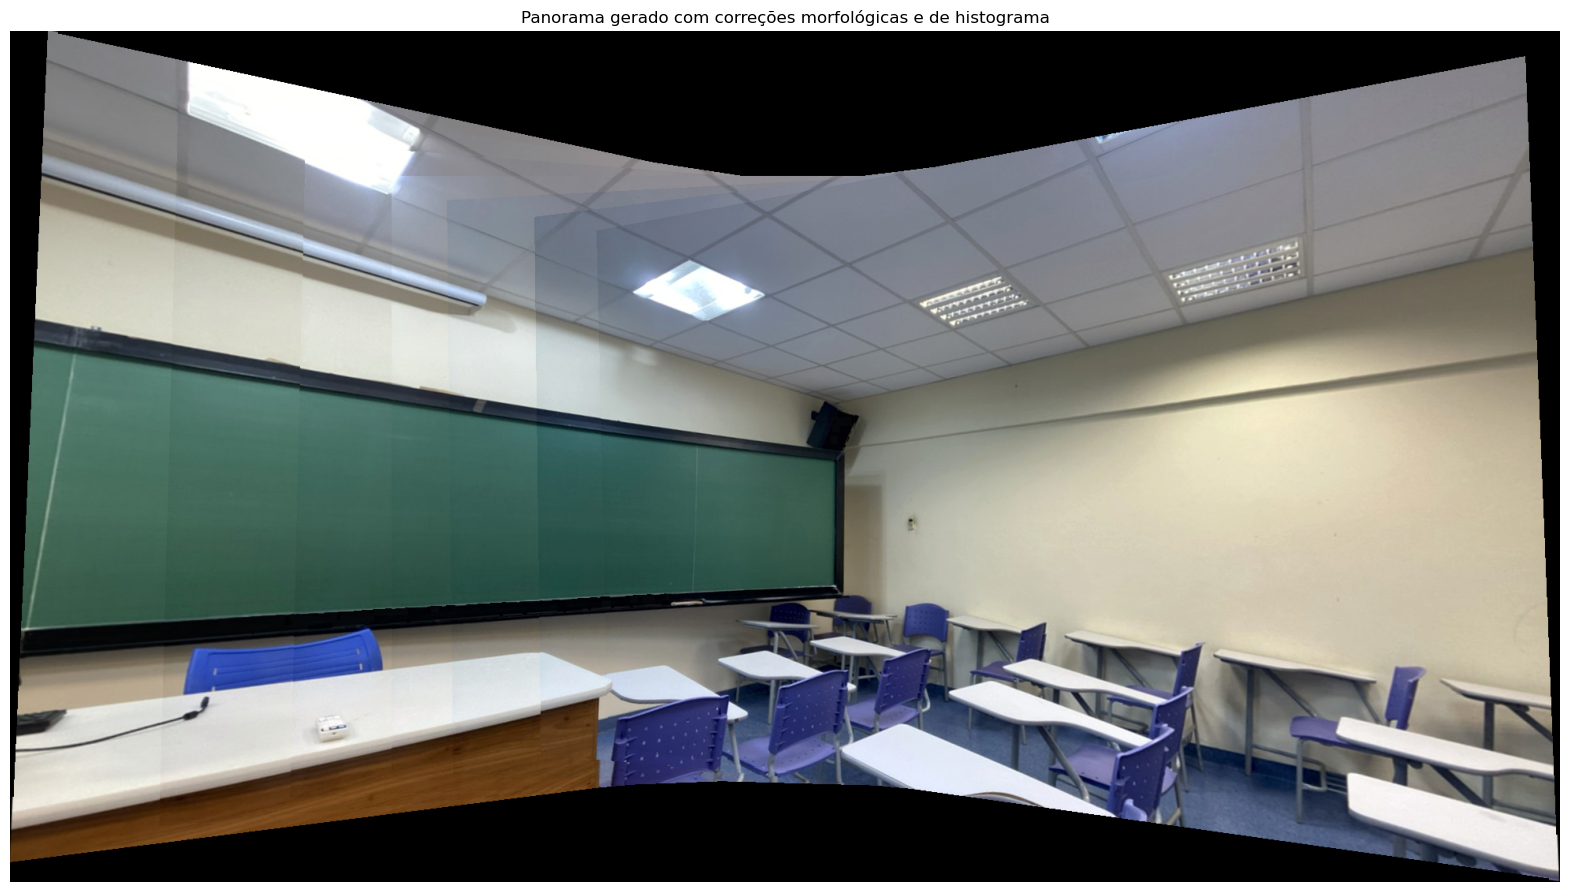

In [126]:
print("--- Iniciando a criação do panorama morfologia com correção por bordas ---")

# Passo 1: Calcular homografias entre pares de imagens
homografias_parciais_morfologia = calcular_todas_as_homografias(images, sift)

# Passo 2: Calcular homografias em relação à imagem central
idx_ref_morfologia = len(images) // 2
homografias_para_referencia = calcular_homografias_para_referencia(homografias_parciais_morfologia, idx_ref_morfologia)

# Passo 3: Renderizar o panorama
panorama_morfologia = renderizar_panorama_morfologia(images, homografias_para_referencia)

# Exibir o panorama gerado
plt.figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(panorama_morfologia, cv2.COLOR_BGR2RGB))
plt.title("Panorama gerado com correções morfológicas e de histograma")
plt.axis('off')

# Salvar as imagens 
output_morfologia = output_dir + 'morfologia/'
os.makedirs(output_morfologia, exist_ok=True)

cv2.imwrite(output_morfologia + 'panorama_morfologia.jpg', panorama_morfologia)

# Geração do panorama final

--- Iniciando a criação do panorama utilizando o blending via feathering ---
--- Panorama concluído! ---


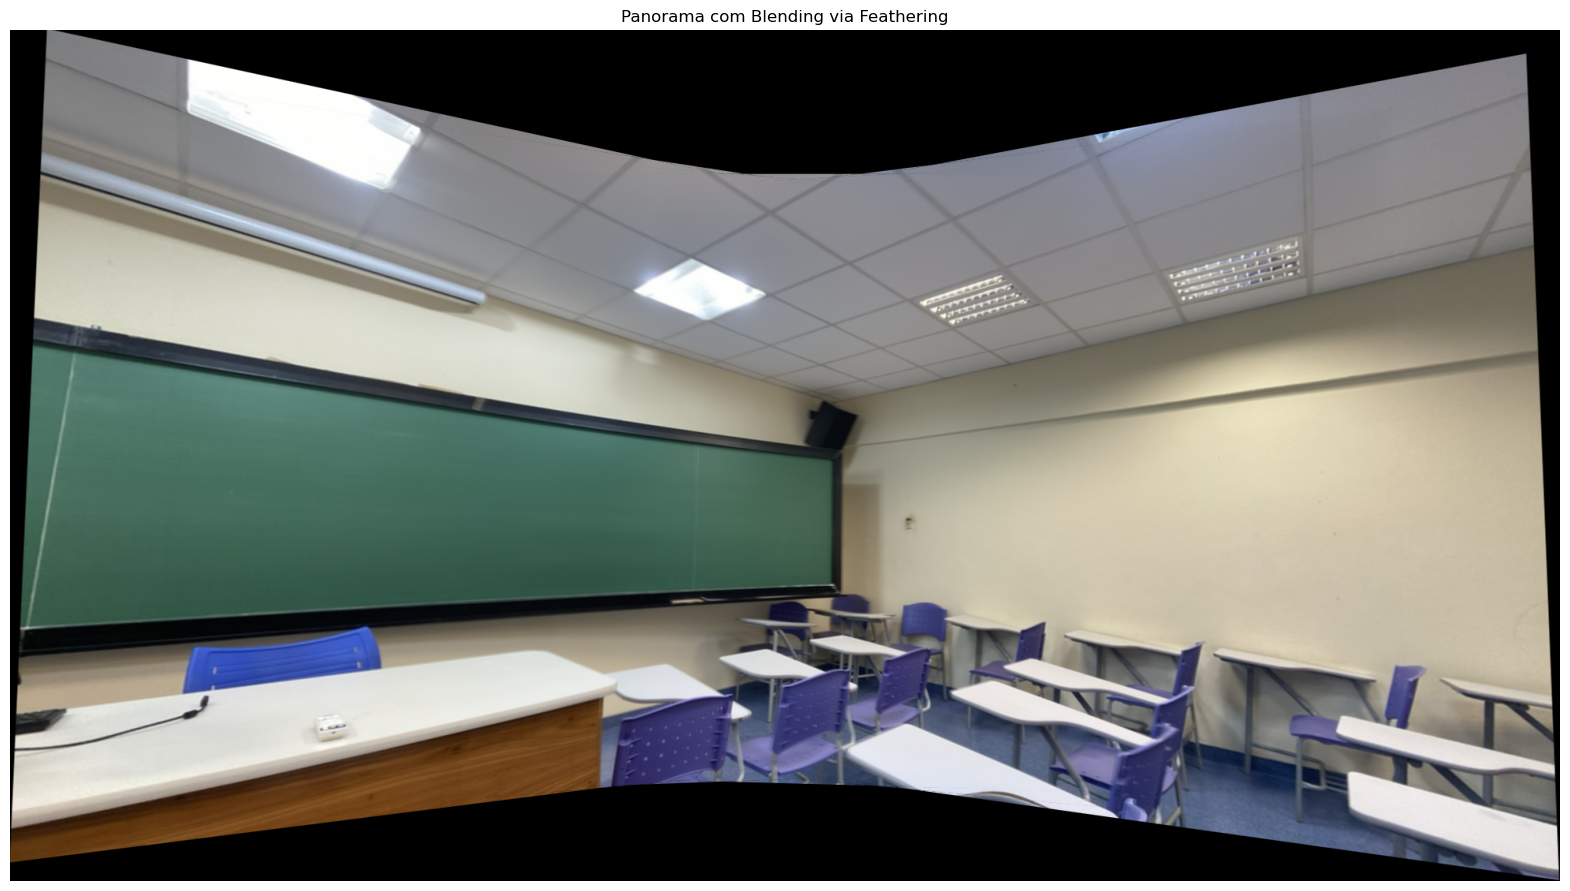

True

In [127]:
print("--- Iniciando a criação do panorama utilizando o blending via feathering ---")

# Passo 1: Calcular homografias entre pares de imagens
homografias_parciais = calcular_todas_as_homografias(images, sift)

# Passo 2: Calcular homografias em relação à imagem central
idx_ref_final = len(images) // 2
homografias_para_referencia = calcular_homografias_para_referencia(homografias_parciais, idx_ref_final)

# Passo 3: Renderizar o panorama
panorama_final = renderizar_panorama_final(images, homografias_para_referencia)

# Exibir o resultado
print("--- Panorama concluído! ---")
plt.figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(panorama_final, cv2.COLOR_BGR2RGB))
plt.title("Panorama com Blending via Feathering")
plt.axis('off')
plt.show()

# Salvar a imagem 
output_final = output_dir + 'final/'
os.makedirs(output_final, exist_ok=True)

cv2.imwrite(output_final + 'panorama_final.jpg', panorama_final)

# Otimização global - Falha!

Implementação de um algoritmo para otimização global dos cálculos de homografia, proporcionando uma menor distorção das imagens com menor semelhança à utilizada como pivo.

In [ ]:
# --- INÍCIO DO FLUXO OTIMIZADO (MÉTODO DO ARTIGO) ---

# CÉLULA NOVA: PREPARAÇÃO DE DADOS (MODELO ROTACIONAL)
def obter_pontos_correspondentes(sifts):
    """Prepara os dados de correspondência entre todas as imagens adjacentes."""
    pares = []
    for i in range(len(sifts) - 1):
        kp1, desc1 = sifts[i]
        kp2, desc2 = sifts[i+1]
        correspondencias = encontrar_correspondencias(desc1, desc2)
        pts1 = np.float32([kp1[m.queryIdx].pt for m in correspondencias])
        pts2 = np.float32([kp2[m.trainIdx].pt for m in correspondencias])
        pares.append({'indices': (i, i+1), 'pts1': pts1, 'pts2': pts2})
    return pares

In [ ]:
# CÉLULA FINALMENTE CORRIGIDA: FUNÇÃO DE ERRO (MODELO ROTACIONAL - ARTIGO)

def erro_reprojecao_rotacional(params, num_imagens, idx_ref, pontos_pares, centros_imagens):
    """
    A função de erro CORRIGIDA, medindo o erro no espaço de referência global.
    """
    focal = params[0]
    residuos = []

    rotacoes = []
    for i in range(num_imagens):
        if i == idx_ref:
            R, _ = cv2.Rodrigues(np.zeros(3)); rotacoes.append(R)
            continue
        p_idx = 1 + (i if i < idx_ref else i - 1) * 3
        r_vec = params[p_idx : p_idx + 3]
        R, _ = cv2.Rodrigues(r_vec); rotacoes.append(R)

    for par in pontos_pares:
        i, j = par['indices']
        pts_i, pts_j = par['pts1'], par['pts2']
        R_i, R_j = rotacoes[i], rotacoes[j]
        cx_i, cy_i = centros_imagens[i]
        cx_j, cy_j = centros_imagens[j]

        # --- Lógica Corrigida ---
        # 1. Converte pontos 2D de cada imagem para raios 3D em seus próprios sistemas de coordenadas
        pts_i_norm = np.array([(p[0] - cx_i) / focal for p in pts_i]), np.array([(p[1] - cy_i) / focal for p in pts_i])
        pts_j_norm = np.array([(p[0] - cx_j) / focal for p in pts_j]), np.array([(p[1] - cy_j) / focal for p in pts_j])

        pts_i_3d = np.vstack([pts_i_norm[0], pts_i_norm[1], np.ones(len(pts_i))]).T
        pts_j_3d = np.vstack([pts_j_norm[0], pts_j_norm[1], np.ones(len(pts_j))]).T

        # Normaliza os raios 3D para que sejam vetores unitários (pontos na esfera unitária)
        pts_i_3d /= np.linalg.norm(pts_i_3d, axis=1)[:, np.newaxis]
        pts_j_3d /= np.linalg.norm(pts_j_3d, axis=1)[:, np.newaxis]

        # 2. Rotaciona ambos os raios para o sistema de coordenadas de REFERÊNCIA GLOBAL
        # A rotação para a referência é a inversa (transposta) da rotação da referência.
        pts_i_no_ref = (R_i.T @ pts_i_3d.T).T
        pts_j_no_ref = (R_j.T @ pts_j_3d.T).T

        # 3. O erro é a diferença vetorial entre os dois pontos na esfera de referência
        erro_vetorial = (pts_i_no_ref - pts_j_no_ref).flatten()
        residuos.extend(erro_vetorial)

    return np.array(residuos)

In [ ]:
# CÉLULA NOVA: FUNÇÃO PARA ESTIMAR ROTAÇÕES INICIAIS

def estimar_rotacoes_iniciais(homografias_iniciais, centros_imagens, focal_inicial, idx_ref):
    """
    Usa as homografias não otimizadas para extrair uma estimativa inicial para as rotações.
    Isso fornece um ponto de partida muito melhor para o otimizador.
    """
    rotacoes_iniciais_vecs = []

    # Matriz de calibração da câmera de referência
    cx_ref, cy_ref = centros_imagens[idx_ref]
    K_ref = np.array([[focal_inicial, 0, cx_ref], [0, focal_inicial, cy_ref], [0, 0, 1]])
    K_ref_inv = np.linalg.inv(K_ref)

    for i, H in enumerate(homografias_iniciais):
        if i == idx_ref:
            continue # A rotação da referência é zero

        # Matriz de calibração da câmera atual
        cx_i, cy_i = centros_imagens[i]
        K_i = np.array([[focal_inicial, 0, cx_i], [0, focal_inicial, cy_i], [0, 0, 1]])

        # Estima a rotação a partir da homografia: R = K_ref_inv * H * K_i
        R_estimada = K_ref_inv @ H @ K_i

        # Converte a matriz de rotação 3x3 para um vetor de rotação de 3 parâmetros (Rodrigues)
        r_vec, _ = cv2.Rodrigues(R_estimada)
        rotacoes_iniciais_vecs.append(r_vec.flatten())

    return rotacoes_iniciais_vecs

In [ ]:
# CÉLULA FINAL ATUALIZADA: ORQUESTRADOR COM ESTIMATIVA INICIAL INTELIGENTE

def criar_panorama_com_modelo_rotacional(images, sifts):
    """
    Fluxo principal que utiliza o modelo de câmera em rotação com uma estimativa inicial robusta.
    """
    num_imagens = len(images)
    idx_ref = num_imagens // 2

    # --- ETAPA DE PRÉ-CÁLCULO PARA A ESTIMATIVA INICIAL ---
    print("Pré-cálculo: Gerando homografias não otimizadas para a estimativa inicial...")
    homografias_parciais = calcular_todas_as_homografias(images, sift)
    homografias_iniciais_nao_otimizadas = calcular_homografias_para_referencia(homografias_parciais, idx_ref)

    # --- INÍCIO DO FLUXO PRINCIPAL ---
    print("Passo 1: Preparando dados de correspondência...")
    pontos_pares = obter_pontos_correspondentes(sifts)
    centros_imagens = [(img.shape[1]/2, img.shape[0]/2) for img in images]

    # Estimativa inicial para a distância focal
    focal_inicial = images[idx_ref].shape[1]

    print("Passo 2: Estimando rotações iniciais a partir das homografias...")
    rotacoes_iniciais = estimar_rotacoes_iniciais(homografias_iniciais_nao_otimizadas, centros_imagens, focal_inicial, idx_ref)

    # Monta o vetor de parâmetros iniciais (x0)
    params_iniciais = [focal_inicial]
    params_iniciais.extend(np.array(rotacoes_iniciais).flatten())

    print("Passo 3: Executando a otimização global com uma estimativa inicial inteligente...")
    resultado_otimizacao = least_squares(
        fun=erro_reprojecao_rotacional,
        x0=np.array(params_iniciais),
        args=(num_imagens, idx_ref, pontos_pares, centros_imagens),
        method='trf', verbose=2, m
    )

    print("Passo 4: Otimização concluída! Convertendo rotações otimizadas em homografias...")
    params_otimizados = resultado_otimizacao.x
    focal_otimizado = params_otimizados[0]
    print(f"Distância Focal Otimizada: {focal_otimizado:.2f}")

    homografias_finais = []
    for i in range(num_imagens):
        cx, cy = centros_imagens[i]; K = np.array([[focal_otimizado, 0, cx], [0, focal_otimizado, cy], [0, 0, 1]])
        cx_ref, cy_ref = centros_imagens[idx_ref]; K_ref = np.array([[focal_otimizado, 0, cx_ref], [0, focal_otimizado, cy_ref], [0, 0, 1]])

        if i == idx_ref:
            R, _ = cv2.Rodrigues(np.zeros(3))
        else:
            # Reorganiza o índice para pegar a rotação correta do vetor de parâmetros
            p_idx_otimizado = 1 + (i if i < idx_ref else i - 1) * 3
            r_vec = params_otimizados[p_idx_otimizado : p_idx_otimizado + 3]
            R, _ = cv2.Rodrigues(r_vec)

        H = K_ref @ R @ np.linalg.inv(K)
        homografias_finais.append(H)

    print("Passo 5: Renderizando o panorama final...")
    panorama = renderizar_panorama_final(images, homografias_finais)
    return panorama

# --- EXECUÇÃO FINAL ---
print("\n--- Iniciando a criação do panorama OTIMIZADO (com estimativa inicial inteligente) ---")
panorama_final_robusto = criar_panorama_com_modelo_rotacional(images, sift)

print("--- Panorama OTIMIZADO concluído! ---")
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(panorama_final_robusto, cv2.COLOR_BGR2RGB))
plt.title("Panorama Final com Modelo Rotacional Otimizado (Estimativa Inteligente)")
plt.axis('off')
plt.show()

# Composição e Blending

# Código para excluir as imagens

**CUIDADO:** Este código excluirá permanentemente todos os arquivos com as extensões `.jpeg`, `.jpg`, e `.png` do diretório atual. Certifique-se de que você realmente quer excluir esses arquivos antes de executar a célula.

In [ ]:
import os

# Lista as extensões dos arquivos que você quer excluir
extensoes_a_excluir = ['.jpeg', '.jpg', '.png']

# Pega a lista de todos os arquivos no diretório atual
arquivos_no_diretorio = os.listdir()

# Itera sobre os arquivos e exclui aqueles que têm as extensões especificadas
arquivos_excluidos = []
# for arquivo in arquivos_no_diretorio:
#     if any(arquivo.endswith(ext) for ext in extensoes_a_excluir):
#         try:
#             os.remove(arquivo)
#             arquivos_excluidos.append(arquivo)
#         except OSError as e:
#             print(f"Erro ao excluir o arquivo {arquivo}: {e}")

print(f"Arquivos excluídos: {arquivos_excluidos}")